# Pandas in a nutshell v2

Pandas is one of the most essential Python libraries, especially when working with tabular data. Pandas simplifies data curation, manipulation, and visualization of data considerably. In this notebook, you can find an introduction to using Pandas in data science projects.

<u>**Outline:**</u>
1. [Importing the Pandas library](#1)
2. [Importing data](#2)
    1. [Loading Excel or csv files](#2.1)
    2. [Accessing APIs](#2.2)
3. [Pandas Series](#3) **[(TASK I)](#task1)**
4. [Pandas DataFrames](#4)
    1. [Generating and accessing  Pandas DataFrames](#4.1) **[(TASK II)](#task2)**
    2. [Operations on DataFrames](#4.2)
        1. [Selecting data](#4.2.1)
        2. [Slicing data frames](#4.2.2) 
           1. [Slicing by label with loc](#4.2.2.1)
           2. [Slicing by position with iloc](#4.2.2.2)
        3. [Filtering](#4.2.3)
        4. [Transposing, Sorting, and Grouping](#4.2.4)
   **[(TASK III)](#task3)**
5. [Profiling](#5)
6. [Final Remarks](#6)

<u>**References:**</u> 
- For the full Pandas documentation see https://pandas.pydata.org/docs/. 
- Pandas Getting Started Guide: https://pandas.pydata.org/docs/getting_started/index.html#getting-started.
- A *cheat sheet* on data manipulation with Pandas: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.
- For the basic basics of plotting with Pandas, see https://www.enthought.com/wp-content/uploads/2019/09/Enthought-Pandas-Cheat-Sheet-1-Plotting-with-Series-and-DataFrames-v1.0.2.pdf.
- For more complete info on plotting with Pandas see https://pandas.pydata.org/docs/user_guide/visualization.html. 

<u>**Authors:**</u> 
- Julian Vicens: <julianvicens@ub.edu>
- Franciska Peter


## 1. Importing the pandas library <a class="anchor" id="1"></a>
Pandas is typically imported into the namespace pd, just as numpy is typically imported as np.

In [1]:
import numpy as np
import pandas as pd

## 2. Importing data <a class="anchor" id="2"></a>
Data can be imported either by loading files or by accessing an API (Application Programming Interface).

### 2.1. Loading Excel or csv files <a class="anchor" id="2.1"></a>
For instance with functions [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) or [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) tables are loaded from files into Pandas DataFrames.

**Data extracted from:** Nelson AB, Faraguna U, Zoltan JT, Tononi G, Cirelli C. Sleep patterns and homeostatic mechanisms in adolescent mice. Brain Sci. 2013 Mar 19;3(1):318-43. doi: 10.3390/brainsci3010318. PMID: 23772316; PMCID: PMC3682503.

In [3]:
# data directory
data_dir = "../data/"

In [4]:
mice_xlsx = pd.read_excel(data_dir + "Sleep_Patterns_and_Homeostatic_Mechanisms_in_Adolescent_Mice_2013.xlsx",
                         index_col=0,
                         header=0)
# show loaded table:
mice_xlsx

,p,AIC,R2
(A) Frontal: Predictors for SWA rebound (5/1); % change SWA (5/1) = B0 + (predictors),,,
Weight-adjusted age (using Gompertz fit),0.005070,362,0.18900
Recovery days from surgery,0.430000,370,0.01640
REM/NREM amount (12 h of recovery),0.007100,363,0.17500
n of sleep attempts during sleep deprivation,0.053000,367,0.09530
Sleep during sleep deprivation (min/4 h),0.058200,367,0.09130
"Brief arousals (n/min of sleep, first 4 h of recovery)",0.310000,369,0.02730
Increase in wake SWA (1–4 Hz) during sleep deprivation,0.760000,370,0.02490
Slow wave energy (SWE = SWA × time) during deprivation (wake and NREM),0.840000,371,0.00110
Time spent awake since last sleep,0.910000,371,0.00033


In [5]:
mice_csv = pd.read_csv(data_dir + "Sleep_Patterns_and_Homeostatic_Mechanisms_in_Adolescent_Mice_2013.csv",
                         index_col=0,
                         header=0)
# show loaded table:
mice_csv

,p,AIC,R2
(A) Frontal: Predictors for SWA rebound (5/1); % change SWA (5/1) = B0 + (predictors),,,
Weight-adjusted age (using Gompertz fit),0.005070,362,0.18900
Recovery days from surgery,0.430000,370,0.01640
REM/NREM amount (12 h of recovery),0.007100,363,0.17500
n of sleep attempts during sleep deprivation,0.053000,367,0.09530
Sleep during sleep deprivation (min/4 h),0.058200,367,0.09130
"Brief arousals (n/min of sleep, first 4 h of recovery)",0.310000,369,0.02730
Increase in wake SWA (1–4 Hz) during sleep deprivation,0.760000,370,0.02490
Slow wave energy (SWE = SWA × time) during deprivation (wake and NREM),0.840000,371,0.00110
Time spent awake since last sleep,0.910000,371,0.00033


### 2.2. Accessing APIs <a class="anchor" id="2.2"></a>

You will usually find a sample code for how to access an API on the webpage that publishes the open data. For our example, the open data provider [Portal de Dades Obertes de Catalunya](https://analisi.transparenciacatalunya.cat/) here for example the following [database](https://analisi.transparenciacatalunya.cat/Energia/Consum-d-energia-el-ctrica-per-municipis-i-sectors/8idm-becu) about energy consumption, requires the installation of [sodapy](https://github.com/xmunoz/sodapy) which has been installed with the requirements:

In [6]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8idm-becu", limit=2000)

# Convert to pandas DataFrame
consum_energia_df = pd.DataFrame.from_records(results)

# show loaded table:
consum_energia_df

,any,provincia,comarca,cdmun,municipi,codi_sector,descripcio_sector,consum_kwh,observacions
0,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,1,PRIMARI,237755,NaN
1,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,3,INDUSTRIAL,66604371,NaN
2,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,4,CONSTRUCCIO I OBRES PUBLIQUES,710769,NaN
3,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,5,TRANSPORT,NaN,Dada subjecta a secret estadístic.
4,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,6,TERCIARI,100629015,NaN
...,...,...,...,...,...,...,...,...,...
1995,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,4,CONSTRUCCIO I OBRES PUBLIQUES,331255,NaN
1996,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,5,TRANSPORT,NaN,Dada subjecta a secret estadístic.
1997,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,6,TERCIARI,14183806,NaN
1998,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,7,USOS DOMESTICS,10101499,NaN


You see that they limit the downloaded lines to the first 2000 lines, but you can alter these numbers according to your needs. Acctually, if you register in their webpage they give you a TOKEN that allows you to access more lines in a quicker way. 

Note that on this particular database on energy consumption, you also find extensive information on who recorded the data when or what is the meaning of each column.

## 3. Pandas Series <a class="anchor" id="3"></a>
Above, we loaded **Pandas DataFrames** that represent tables. 
To begin with pandas, it is helpful to start with "one-column tables" that are represented by **Pandas Series**. For the full documentation of Pandas Series see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

In [7]:
# Pandas Series of strings
observed_birds = pd.Series(["Wallcreeper",
                            "Lammergeier",
                            "Lammergeier",
                            "Lammergeier",
                            "Dupont's Lark",
                            "Pin-tailed Sandgrouse",
                            "Lammergeier",
                            "Wallcreeper",
                            "Little Bustard",
                            "Dupont's Lark",
                            "Wallcreeper",
                            "Wallcreeper",
                            "Citril Finch",
                            "Black Wheatear",
                            "Snowfinch"
                            ], 
                           dtype = str, # if you put nothing here, pandas inferres the type itself
                           name = "birds"
                          )

# show Pandas series: 
observed_birds

0               Wallcreeper
1               Lammergeier
2               Lammergeier
3               Lammergeier
4             Dupont's Lark
5     Pin-tailed Sandgrouse
6               Lammergeier
7               Wallcreeper
8            Little Bustard
9             Dupont's Lark
10              Wallcreeper
11              Wallcreeper
12             Citril Finch
13           Black Wheatear
14                Snowfinch
Name: birds, dtype: object

<Axes: ylabel='count'>

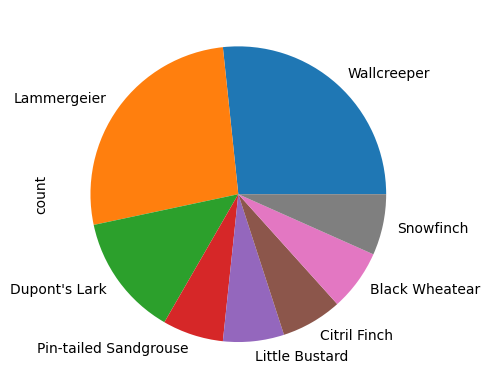

In [8]:
# the number of appearances of each bird, e.g. in a pie chart
observed_birds.value_counts().plot.pie()

Pandas Series can contain a variety of python data types, such as strings, integers, time stamps, and of course also floats. As an example, we'll draw N=10000 Gaussian random numbers and plot a histogram for them. Note that by loading pandas, we already loaded matplotlib.pyplot into namespace plt.

0       1.370955
1       1.710882
2       1.449111
3       3.316729
4       0.435993
          ...   
9995    2.293821
9996    2.131522
9997    2.475652
9998    2.969159
9999    2.485517
Length: 10000, dtype: float64

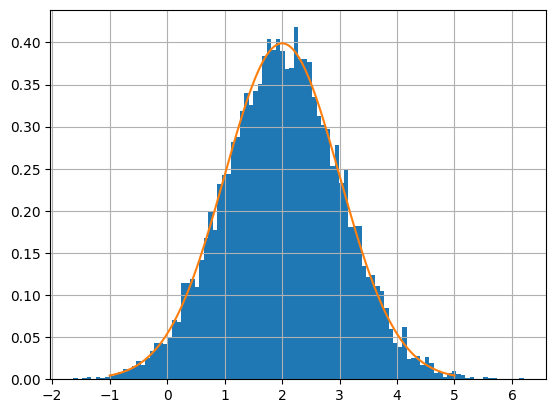

In [9]:
# you can also gererate a Pandas Series of floats...
N=10000
sigma = 1
mu = 2
random_numbers_array = np.random.normal(mu, sigma, N) # N gaussian random numbers i  a numpy array
random_numbers = pd.Series(random_numbers_array)  # convert to Series
# ... and plot the NORMALIZED histogram in one line
ax = random_numbers.hist(density=True, 
                        bins =100)
# add the analytic formula of the gaussian 
x = np.linspace(-1, 5, 200)
ax.plot(x, np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma))

## and back to numpy :
# random_numbers.to_numpy()

random_numbers

# TASK I: <a class="anchor" id="task1"></a>
Label x and y axis, change the color of the bars and the line, and give the plot a title.

In the following you see that simple numpy operations can directly be applied on Pandas Series (i.e. on columns of Data Frames). The output is again a pandas Series. 

Further, you'll see that you can print some basic statistics of pandas Series using pandas function *describe*

In [ ]:
# take the absolute value of each item in the Pandas series 
# and plot a histogram of the result
ax = abs(random_numbers).hist(bins=50, density=True)

# print some basic statistics of a Pandas series
abs(random_numbers).describe()

In [ ]:
#### Solution

## 4. Pandas DataFrames <a class="anchor" id="4"></a>
You find the full documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html.

### 4.1. Generating  and accessing Pandas DataFrames <a class="anchor" id="4.1"></a>
.. and some manipulations.

At first we see how to generate an empty data frame and fill it column by column. We see what's an index and what's a column. Then, we generate a data frame from a dictionary.

In [ ]:
# There are plenty of different ways to create a DataFrame. 

# An empty DataFrame can be created by
df = pd.DataFrame()  
df

In [ ]:
# This empty DataFrame can be filled columnwise with lists:

# e.g.: add new column with name "Country" to data frame df
df["Country"]  = ["UK", "France", "Spain"]
df["Capital"] = ["London", "Paris", "Madrid"]
df["Inhabitants Country in Mio"] = [67.22, 67.39, 47.35]
df

In [ ]:
# it makes sense to give column names without spaces, so you can do:
df.Capital  # this returns a pandas Series with name Capital!

We can also transform the above bird pandas series into a data frame. The Series name turns into the column name.

In [ ]:
# data frames and pandas series are not the same thing
birds_df = pd.DataFrame(observed_birds)
# Note the column name
birds_df

In [ ]:
# we can change the column name with function rename():
birds_df =birds_df.rename(columns={"birds":"bird names"}) # the same works with index
birds_df

Back to the countries dataframe...

In [ ]:
# column's names
df.columns

In [ ]:
# row indexes names
df.index

In [ ]:
# You can also create a single-column DataFrame from a list (This is not a Pandas Series!)
df = pd.DataFrame( ["UK", "France", "Spain"], columns = ["Country"])  
df

In [ ]:
# or start from a python dictionary with lists as values (must be of same length).
country_dict = { "Country" :            ["UK",     "France", "Spain"],
                 "Capital":            ["London", "Paris", "Madrid"],
                 "Inhabitants Country in Mio": [67.22, 67.39, 47.35]}
# write DataFrame to file, but without the index
pd.DataFrame(country_dict).to_csv(data_dir + "countries.csv", index = False)
# print inline
country_df = pd.DataFrame(country_dict) # in jupyter, we just write the name of the dataFrame into the last line to show it nicely.
# in a *.py file (in a script)

country_df

In [ ]:
# If you pass a dictionary with scalars instead of lists, 
# you have to tell pandas how to interpret that (by adding items())
fruit_colors = {"banana": "yellow",
                "apple" : "green",
                "orange": "orange",
                "cherry": "red",
                "berry" : "black",
                "hammer": "grey"
               }
fruit_df = pd.DataFrame(fruit_colors.items(), 
                        columns=["fruit", "color"])
fruit_df

In [ ]:
# you might want to have fruit as the index
fruit_df = fruit_df.set_index("fruit")
fruit_df

In [ ]:
# then you can access values by column + index
fruit_df.color.apple

In [ ]:
# hammer is not a fruit, so we just drop it from the data frame
fruit_df = fruit_df.drop("hammer")
fruit_df

In [ ]:
# or you might regret setting "fruits" as index
fruit_df = fruit_df.reset_index()
fruit_df

#### Deprecated functions and handling exceptions

The pandas function **append()** cannot be called anymore because it is deprecated since version 1.4.0. Below you'll see how to use **concat()** instead. 

In [ ]:
try:
    fruit_df.append({"fruit":"plum", "color":"lila"}, ignore_index=True)
except Exception as e:
     print(type(e), e)

We use the `try/except` block to handle exceptions.

- The `try` block lets you test a block of code for errors.
- The `except` block lets you handle the error.

In this case, we show the message of the Exception due to `append()` is deprecated

As a developer, it is also possible to `raise` exceptions.

Take a look at the Python [documentation](https://docs.python.org/3/tutorial/errors.html) for more information on this topic.



In [ ]:
pd.concat([fruit_df,
           pd.DataFrame({"plum":"lila"}.items(), 
                        columns=["fruit", "color"])
          ], 
          ignore_index=True)

In [ ]:
# remove column "color" with function pop
fruit_df.pop("color")
fruit_df

NOTE that the usage of <code>pop()</code> (for removing columns) is different from that of <code>drop()</code> (for deleting rows):

    fruit_df = fruit_df.drop("hammer")
    fruit_df  
vs
    
    fruit_df.pop("color")
    fruit_df
    
For more on <code>pop()</code> see https://www.geeksforgeeks.org/python-pandas-dataframe-pop/

In [ ]:
# And finally, and quite common, you can load excel sheets, csv files ( ..json, pickle, parquet..)
# use help(pd.read_csv("countries.csv") ) to know more
country_df = pd.read_csv(data_dir + "countries.csv") 
# equivalent: pd.read_excel("countries.xlsx")
country_df

You can overwrite a column with a list:

In [ ]:
country_df

In [ ]:
country_df.Capital = ["LON", "PAR", "MAD"] # you can replace complete columns like this
country_df

And you can output a subdataframe, consisting of several columns with their entries.

In [ ]:
country_df[["Country","Capital"]] # returns a DataFrame, note the flipped order of columns

# TASK II: <a class="anchor" id="task2"></a>

Add another country with its capital and number of inhabitants to the table. 

In [ ]:
#### solution

### 4.2. Operations on DataFrames <a class="anchor" id="4.2"></a>

#### 4.2.1. Selecting data <a class="anchor" id="4.2.1"></a>

We start from this dataset from Kaggle with data from IMDB https://www.kaggle.com/datasets/omarhanyy/imdb-top-1000/discussion/393097


In [ ]:
df_imdb = pd.read_csv(data_dir+"imdb/imdb_top_1000.csv")

You already know how to access columns and rows: 

In [ ]:
df_imdb.columns

In [ ]:
df_imdb["Series_Title"] # returns a Series

In [ ]:
df_imdb.Series_Title # same thing; therefore: try to avoid using spaces in your column names

#### 4.2.2. Slicing data frames <a class="anchor" id="4.2.2"></a>
Slicing means to output one or several columns or rows. 
Slices can be either accessed by label with loc or by index with iloc.

In [ ]:
# original data frame at this point, before slicing: 
df_imdb.head(3)

#### 4.2.2.1. Slicing by label with **loc** <a class="anchor" id="4.2.2.1"></a>
To change individual fields of the dataframe you need to use loc (by label) or iloc (by position).
With indexing, your output is the value of the field.

In [ ]:
# syntax: df.loc[row_indexer,column_indexer]
df_imdb.loc[2, "Series_Title"] # the output is the column value of the row with index 2 and column Series_Title 

Note that in the above example, 2 means the label and not the position of the respective row!

In [ ]:
df_imdb.loc[2] # the output is the row with index 2 as pandas series

In [ ]:
df_imdb.loc[:, "Series_Title"] # the output is the column Series_Title as pandas series

#### 4.2.2.2.  Slicing by position with **iloc** <a class="anchor" id="4.2.2.2"></a>

In [ ]:
df_imdb.iloc[1, 2] # the output is the column value of the row with position 1 
                   # (note that python always counts from 0) and column with position 2

In [ ]:
df_imdb.iloc[1, 1: 5] # 

### 4.2.3. Filtering <a class="anchor" id="4.2.3"></a>

Pandas DataFrames (and Series) can be filtered by using **boolean expressions**.

In [ ]:
df_imdb[df_imdb["Director"]=="Francis Ford Coppola"] # use Boolean expressions for picking a row/ several rows

In [ ]:
df_imdb[df_imdb["Director"]=="Francis Ford Coppola"].Star1

Lets show the series and films premired in 2020 onwards

In [ ]:
try:
    df_imdb[df_imdb["Released_Year"] > 2020] # Another boolean expression
except Exception as e:
     print(type(e), e)

The series in column Released_Year is not a integer, let's convert to int

In [ ]:
try:
    df_imdb["Released_Year"] = df_imdb["Released_Year"].astype(int) 
except Exception as e:
     print(type(e), e)


It's not possible to convert it to int(). This error is caused because we try to convert an string to int instead to a float. So let's convert to int and then to float.
We will use the function **apply()** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [ ]:
# Function we apply to the series
def toInt(x, ):
    try:
        x = int(float(x)) # from string to float to int
    except:
        x = np.NaN
    return x

In [ ]:
df_imdb['Released_Year'] = df_imdb['Released_Year'].apply(toInt)


In [ ]:
df_imdb[df_imdb["Released_Year"] >= 2020]

### 4.2.4. Transposing, Sorting, and Grouping <a class="anchor" id="4.2.4"></a>

You might have noticed that it's so easy and quick to work with columns and rather cumbersome and slow to work with rows. You can switch roles by transposing the table.

In [ ]:
df_imdb.T

You can sort an index alphabetically...

In [ ]:
df_imdb.T.sort_index(axis=0, ascending=True) # try also: ascending = False

... or sort rows by the values of a column, eg. countries by their number of inhabitants:

In [ ]:
df_imdb.sort_values(by="Released_Year", ascending=True)

To show how to **group**, we will groub by director and count how many series has been included in the list

In [ ]:
df_imdb[["Director", "Series_Title"]].groupby('Director').count()

Now we check which directors have more than 10 productions in the list and we group by Star1 (the main character) to see which are the characters

In [ ]:
s = df_imdb[["Director", "Series_Title"]].groupby('Director').count()
s[s.Series_Title > 10].index.tolist()

In [ ]:
df_imdb[df_imdb["Director"] == s[s.Series_Title > 10].index.tolist()[0]][["Director", "Star1"]].groupby('Star1').count()

# TASK III: <a class="anchor" id="task3"></a>

1. Add one of your favorite films or series to this dataset, including the actual data from IMDB.
2. Calculate the average IMDB rating for all the films directed by the same director and save the result in a new column.

You might want to crate a copy of the current data frame, so you don't have to rerun the notebook over and over again.

In [ ]:
df_imdb_copy = df_imdb.copy()

In [ ]:
#### solution

## 5. Profiling <a class="anchor" id="5"></a>

`ydata-profiling` is a leading package for data profiling, that automates and standardizes the generation of detailed reports, complete with statistics and visualizations. It supports Pandas and Spark Dataframes, databases and data storages, and offers features such as data catalog, PII management, and time-series analysis.

Install [ydata-profiling](https://github.com/ydataai/ydata-profiling#ydata-profiling)


In [ ]:
from ydata_profiling import ProfileReport


In [ ]:
profile = ProfileReport(df_imdb, title="Profiling Report")
profile

## 6. Remarks <a class="anchor" id="6"></a>

1. Use tab completion in pandas: start to write df.pl and fill by pressing TAB to complete, e.g. to df.plot()
2. Depending on what we find in the databases that you chose, we might have to deal with Missing Data https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data